In [1]:
#import the necessary libraries
from models import simple_cnn
from models import simple_stacked_fc_nn
from models import custom_vgg
from data_utils import get_dataset_from_tfrecords
from data_utils import audio_to_spectogram
from data_utils import audio_to_melspectogram
import matplotlib.pyplot as plt

The next function was implemented to obtain the datasets for the training, validation and testing process, this function takes as input the size of the batches and a transformation function to be applied to the audio files. The transformation function can be any of the three function we built to extract the features from the audio: audio_to_spectogram, audio_to_melspectogram or audio_to_mfcc.


In [2]:
def get_datasets(batch_size, transformation_fc):
    """get train, validate and test datasets and perform the parsed transformation function"""
    datasets = {}
    splits = ('train', 'validate', 'test')
    for split in splits:
        ds = get_dataset_from_tfrecords(batch_size=batch_size, split=split)
        ds = ds.map(transformation_fc)    #Transform audio to spectogram
        datasets[split] = ds
    return datasets['train'], datasets['validate'], datasets['test']

# 1. Test a simple fully connected NN

In [3]:
# get datasets
train_ds, validation_ds, test_ds = get_datasets(batch_size=64, 
                                                transformation_fc=audio_to_spectogram)
print(train_ds,validation_ds, test_ds, sep='\n')

<MapDataset shapes: ((64, 124, 124, 1), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 124, 124, 1), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 124, 124, 1), (64, 1)), types: (tf.float32, tf.int64)>


In [15]:
#define model parameters
stacked_fc_model = simple_stacked_fc_nn(width=98,
                                        heigth=98,
                                        depth=3,
                                        units_x_layer=512,
                                        classes=12)
print(stacked_fc_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 9604)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4917760   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 12)                6156      
Total params: 5,449,228
Trainable params: 5,449,228
Non-trainable params: 0
____________________________________________

In [16]:
stacked_fc_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [18]:
history = stacked_fc_model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
    410/Unknown - 108s 264ms/step - loss: 0.9907 - accuracy: 0.6735

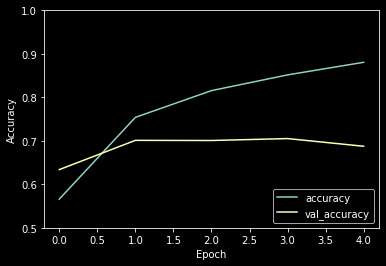

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# 2. Test a 3 phases CNN

In [5]:
train_ds, validation_ds, test_ds = get_datasets(batch_size=64, 
                                                transformation_fc=audio_to_melspectogram)
print(train_ds,validation_ds, test_ds, sep='\n')

<MapDataset shapes: ((64, 98, 98, 1), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 98, 98, 1), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 98, 98, 1), (64, 1)), types: (tf.float32, tf.int64)>


In [8]:
#Creates a 3 conv layers model, input 98x98, 12 output nodes
cnn_3l_model = simple_cnn(98, 98, 12)
print(cnn_3l_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 96, 98)        980       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 98)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 196)       173068    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 196)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 196)       345940    
_________________________________________________________________
flatten_3 (Flatten)          (None, 86436)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 196)              

In [20]:
cnn_3l_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [21]:
history = cnn_3l_model.fit(train_ds, epochs=3, validation_data=validation_ds)

Epoch 1/3
1008/1008 [==============================] - 278s 276ms/step - loss: 1.0085 - accuracy: 0.6697 - val_loss: 0.5192 - val_accuracy: 0.8404
Epoch 2/3
1008/1008 [==============================] - 276s 274ms/step - loss: 0.3189 - accuracy: 0.8963 - val_loss: 0.5364 - val_accuracy: 0.8529
Epoch 3/3
1008/1008 [==============================] - 272s 270ms/step - loss: 0.1669 - accuracy: 0.9469 - val_loss: 0.6730 - val_accuracy: 0.8505


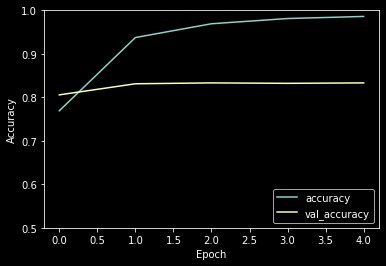

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [22]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_acc)

0.84816575


In [9]:
train_ds, validation_ds, test_ds = get_datasets(batch_size=64, 
                                                transformation_fc=audio_to_melspectogram)
print(train_ds,validation_ds, test_ds, sep='\n')

<MapDataset shapes: ((64, 98, 98, 1), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 98, 98, 1), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 98, 98, 1), (64, 1)), types: (tf.float32, tf.int64)>


In [10]:
custom_vgg_model = custom_vgg()
print(custom_vgg_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 96, 96, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 43, 43, 128)       147584    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 41, 41, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 128)      

In [13]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
1008/1008 [==============================] - 287s 285ms/step - loss: 0.0520 - accuracy: 0.9858 - val_loss: 0.9217 - val_accuracy: 0.8689
Epoch 2/5
1008/1008 [==============================] - 286s 283ms/step - loss: 0.0500 - accuracy: 0.9859 - val_loss: 0.8287 - val_accuracy: 0.8764
Epoch 3/5
1008/1008 [==============================] - 284s 281ms/step - loss: 0.0445 - accuracy: 0.9871 - val_loss: 0.8407 - val_accuracy: 0.8747
Epoch 4/5
1008/1008 [==============================] - 283s 280ms/step - loss: 0.0399 - accuracy: 0.9884 - val_loss: 0.8613 - val_accuracy: 0.8709
Epoch 5/5
1008/1008 [==============================] - 281s 279ms/step - loss: 0.0439 - accuracy: 0.9876 - val_loss: 0.8105 - val_accuracy: 0.8733


In [14]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_acc)

0.8821331


In [15]:
model.save_weights('data/checkpoints/custom_vgg_11')